In [4]:
from PIL import Image, ImageColor
from matplotlib.pyplot import imshow
import numpy as np

In [5]:
import memory_profiler
import time

def time_mem_decorator(func):                                                                                            
    def out(*args, **kwargs):                                                                                            
        m1 = memory_profiler.memory_usage()
        t1 = time.time()
        
        result = func(*args, **kwargs)
        
        t2 = time.time()
        m2 = memory_profiler.memory_usage()
        time_diff = t2 - t1
        mem_diff = m2[0] - m1[0]
        print(f"It took {time_diff} Secs and {mem_diff} Mb to execute this function.")
        return(result)
    return out  

In [6]:
@time_mem_decorator
def draw_circles_naive(pixelmap, centers, radius, color, line_width = 5):
    for c in centers:
        for i in range(720):
            for l in range(line_width):
                x = float(c[0]) + float(radius + l) * np.sin(float(i) * np.pi / 360.0)
                y = float(c[1]) + float(radius + l) * np.cos(float(i) * np.pi / 360.0)
                pixelmap[round(x),round(y)] = ImageColor.getrgb(color)
        

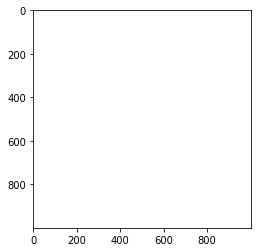

In [7]:
im = Image.new('RGB', (1000,1000), "white")
pixelmap = im.load()
imshow(im)

It took 3.066281318664551 Secs and 0.0 Mb to execute this function.


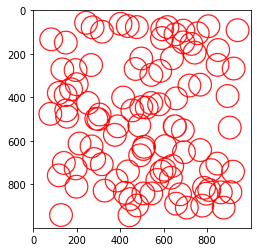

In [8]:
radius = 50
n_circles = 100
centers = [(np.random.randint(radius+5, 1000-(radius+5)) ,np.random.randint(radius+5, 1000-(radius+5))) 
            for i in range(n_circles)]

draw_circles_naive(pixelmap, centers, 50, 'red')
imshow(im)

In [ ]:
# with lookup table

